## Example class implementation:

In [68]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Generate some non-linear data
np.random.seed(42)
m = 1000
X = 4 * np.random.rand(m, 1) - 2
y = 3 + 4 * X + X**5 * 5 + np.random.randn(m, 1) * 10

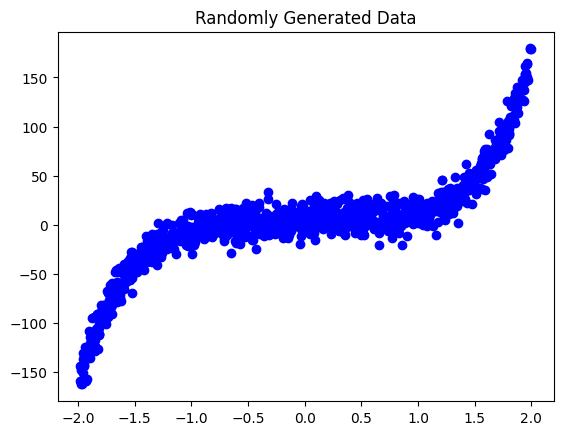

In [70]:
# Plot the data
plt.scatter(X, y, color='blue')
plt.title("Randomly Generated Data")
plt.show()

In [71]:
def validate_input(func):
    def wrapper(self, X, y=None, *args, **kwargs):
        X = np.asanyarray(X)
        if y is not None:
            y = np.asanyarray(y)
        X = np.hstack([X**i for i in range(1, self.degree + 1)])
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        if y is not None:
            return func(self, X, y, *args, **kwargs)
        return func(self, X, *args, **kwargs)
    return wrapper               

# class 
class PolynomialRegression:
    def __init__(self, degree = 2):
        self.degree = degree
        self.theta = None

    @validate_input
    def fit(self, X, y) -> None:
        theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
        self.theta = theta
    
    @validate_input
    def predict(self, X) -> None:
        return X @ self.theta

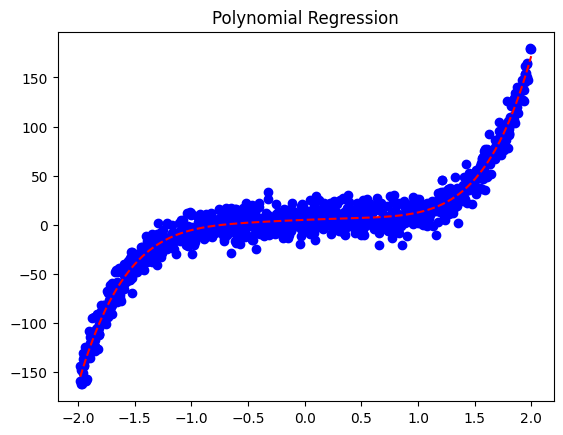

In [72]:
# Test the class
poly_reg = PolynomialRegression(degree=5)
poly_reg.fit(X, y)

sorted_X = np.sort(X, axis=0)
preds = poly_reg.predict(sorted_X)

plt.scatter(X, y, color='blue')
plt.plot(sorted_X, preds, 'r--', label='Line of Best Fit')
plt.title("Polynomial Regression")
plt.show()